In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Crear graficos de mapas
import folium

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("azminetoushikwasi/ucl-202122-uefa-champions-league")

print("Path to dataset files:", path)

100%|██████████| 54.6k/54.6k [00:00<00:00, 23.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/azminetoushikwasi/ucl-202122-uefa-champions-league/versions/22


In [ ]:
tablas = ['attacking.csv', 'attempts.csv', 'defending.csv', 'disciplinary.csv', 'distributon.csv', 'goalkeeping.csv', 'key_stats.csv']

In [ ]:
df_1 = pd.read_csv(path + '/' + tablas[0])
df_2 = pd.read_csv(path + '/' + tablas[1])
df_3 = pd.read_csv(path + '/' + tablas[2])
df_4 = pd.read_csv(path + '/' + tablas[3])
df_5 = pd.read_csv(path + '/' + tablas[4])
df_6 = pd.read_csv(path + '/' + tablas[5])
df_7 = pd.read_csv(path + '/' + tablas[6])

In [ ]:

df_1.head()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [ ]:
df_2.head()

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10


In [ ]:
df_3.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [ ]:
df_4.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


In [ ]:
df_5.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


In [ ]:
df_6.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [ ]:
df_7.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [ ]:
goles = df_7.groupby("club")['goals'].sum().sort_values(ascending=False).reset_index()
goles.head()

,club,goals
0,Bayern,30
1,Liverpool,28
2,Real Madrid,28
3,Man. City,28
4,Chelsea,21


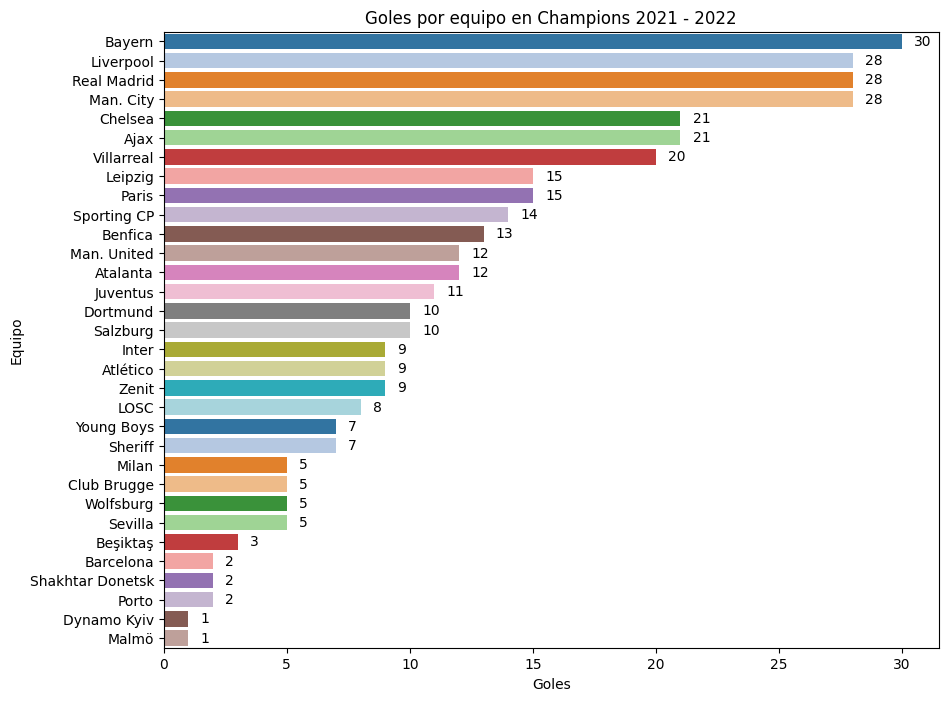

In [ ]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(y = 'club', x = 'goals', data = goles, palette='tab20', hue = 'club')

for p in ax.patches:
    ax.text(p.get_width() + 0.5,            # posición x (ligeramente a la derecha de la barra)
            p.get_y() + p.get_height() / 2, # posición y (centro vertical de la barra)
            int(p.get_width()),             # texto: número de goles
            va='center')
plt.title("Goles por equipo en Champions 2021 - 2022")
plt.ylabel("Equipo")
plt.xlabel("Goles")
plt.show()

In [ ]:
fig = px.bar(goles, x = 'club', y = 'goals', color = 'club')
fig.update_layout(title = "Goles por equipo en Champions 2021 - 2022")
fig.update_xaxes(title = "Equipo")
fig.update_yaxes(title = "Goles")
fig.show()

In [ ]:
n_equipos = [3, 5, 10, len(goles)]
fig = go.Figure()

for i, n in enumerate(n_equipos):
    top_n = goles.head(n)
    fig.add_trace(go.Pie(
        labels = top_n['club'],
        values = top_n['goals'],
        visible = (i == 0),
        name = f'Top {n} Equipos con mas goles en la champions'
    ))

buttons = []
for i, n in enumerate(n_equipos):
  visible = [False] * len(n_equipos)
  visible[i] = True
  buttons.append(dict(label=f'Top {n}',
                        method='update',
                        args=[{'visible': visible},
                              {'title': f'Top {n} equipos con más goles'}]))

fig.update_layout(
    updatemenus=[dict(active=0,
                      buttons=buttons,
                      x=1.1, y=1.1,
                      showactive=True)],
    title='Top equipos con más goles (interactivo)'
)

fig.show()

In [ ]:

# Definir los valores de N que quieres mostrar (para el Top N)
n_values = range(1, len(goles), 2)

# Crear una figura base
fig = go.Figure()

# Crear un frame por cada valor de N
frames = []
for n in n_values:
    top_n = goles.head(n)
    frame = go.Frame(
        data=[go.Pie(labels=top_n['club'], values=top_n['goals'])],
        name=str(n),
        layout=go.Layout(title_text=f'Top {n} equipos con más goles')
    )
    frames.append(frame)

# Agregar el primer gráfico (inicial)
top_init = goles.head(n_values[0])
fig.add_trace(go.Pie(labels=top_init['club'], values=top_init['goals']))

# Añadir los frames a la figura
fig.frames = frames

# Crear el slider
sliders = [{
    'steps': [{
        'method': 'animate',
        'args': [[str(n)], {
            'frame': {'duration': 500, 'redraw': True},
            'mode': 'immediate'
        }],
        'label': f'Top {n}'
    } for n in n_values],
    'transition': {'duration': 0},
    'x': 0.1,
    'xanchor': 'left',
    'y': -0.1,
    'yanchor': 'top'
}]

# Actualizar el layout
fig.update_layout(
    title='Top equipos con más goles (slider)',
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 1000, 'redraw': True},
                'fromcurrent': True
            }]
        }]
    }],
    sliders=sliders
)

# Mostrar la figura
fig.show()


In [ ]:

fig = px.pie(goles, values = 'goals', names = 'club')
fig.show()

In [ ]:
jugador_mas_goels = df_7[["player_name", "goals"]].sort_values('goals', ascending = False).head(10)
jugador_mas_goels.head()

,player_name,goals
2,Benzema,15
66,Lewandowski,13
102,Haller,11
26,Salah,8
184,Nkunku,7


In [ ]:
n_values = range(1, len(jugador_mas_goels) + 1)

fig = go.Figure()

frames = []
for i in n_values:
  top_n = jugador_mas_goels.head(i)
  max_goles = top_n["goals"].max()
  frame = go.Frame(
      data = [go.Bar(x = top_n['player_name'], y = top_n['goals'])],
      name = str(i),
      layout = go.Layout(title_text = f'Top {i} jugadores con mas goles', yaxis = dict(range = [0, max_goles * 1.1]), xaxis = dict(range = [0, i - 0.5]))
  )
  frames.append(frame)

top_ini = jugador_mas_goels.head(n_values[0])
max_ini = top_ini['goals'].max()
fig.add_trace(go.Bar(x = top_ini['player_name'], y = top_ini['goals']))
fig.update_layout(yaxis = dict(range = [0, max_ini * 1.1]))

fig.frames = frames

slider = [{
    'steps' : [{
        'method' : 'animate',
        'args' : [[str(n)], {
            'frame' : {'duration': 500, 'redraw' : True},
            'mode': 'immediate'
        }],
          'label': f'Top {n}'
    }for n in n_values],
    'transition' : {'duration' : 0},
    'x' : 0.0,
    'xanchor' : 'left',
    'y' : -0.1,
    'yanchor' : 'top'
}]

fig.update_layout(
    title = "Top jugadores con mas goles (slider)",
    updatemenus = [{
        'type' : 'buttons',
        'showactive' : False,
        'buttons' : [{
            'label' : 'Play',
            'method' : 'animate',
            'args' : [None, {
                'frame' : {'duration' : 1000, 'redraw' : True},
                'fromcurrent' : True
            }]
        }]
    }],
    sliders = slider
)

fig.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Lista de colores con la misma longitud que jugadores únicos
jugadores = jugador_mas_goels['player_name'].unique()
colores = px.colors.qualitative.Set3 + px.colors.qualitative.Pastel + px.colors.qualitative.Safe
colormap = {jugador: colores[i % len(colores)] for i, jugador in enumerate(jugadores)}

n_values = range(1, len(jugador_mas_goels) + 1)

fig = go.Figure()
frames = []

for i in n_values:
    top_n = jugador_mas_goels.head(i)
    max_goles = top_n["goals"].max()

    # Asignar colores según el jugador
    colores_top = [colormap[n] for n in top_n['player_name']]

    frame = go.Frame(
        data=[go.Bar(
            x=top_n['player_name'],
            y=top_n['goals'],
            marker=dict(color=colores_top)
        )],
        name=str(i),
        layout=go.Layout(
            title_text=f"Top {i} jugadores con más goles",
            xaxis=dict(range=[-0.5, i - 0.5]),  # opcional: ajustar eje x
            yaxis=dict(range=[0, max_goles * 1.1])
        )
    )
    frames.append(frame)

# Gráfico inicial
top_ini = jugador_mas_goels.head(n_values[0])
max_ini = top_ini['goals'].max()
colores_ini = [colormap[n] for n in top_ini['player_name']]

fig.add_trace(go.Bar(
    x=top_ini['player_name'],
    y=top_ini['goals'],
    marker=dict(color=colores_ini)
))
fig.update_layout(
    yaxis=dict(range=[0, max_ini * 1.1])
)

fig.frames = frames

# Slider
slider = [{
    'steps': [{
        'method': 'animate',
        'args': [[str(n)], {
            'frame': {'duration': 500, 'redraw': True},
            'mode': 'immediate'
        }],
        'label': f'Top {n}'
    } for n in n_values],
    'transition': {'duration': 0},
    'x': 0.0,
    'xanchor': 'left',
    'y': -0.1,
    'yanchor': 'top'
}]

# Layout con botón y slider
fig.update_layout(
    title="Top jugadores con más goles (slider)",
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 1000, 'redraw': True},
                'fromcurrent': True
            }]
        }]
    }],
    sliders=slider
)

fig.show()


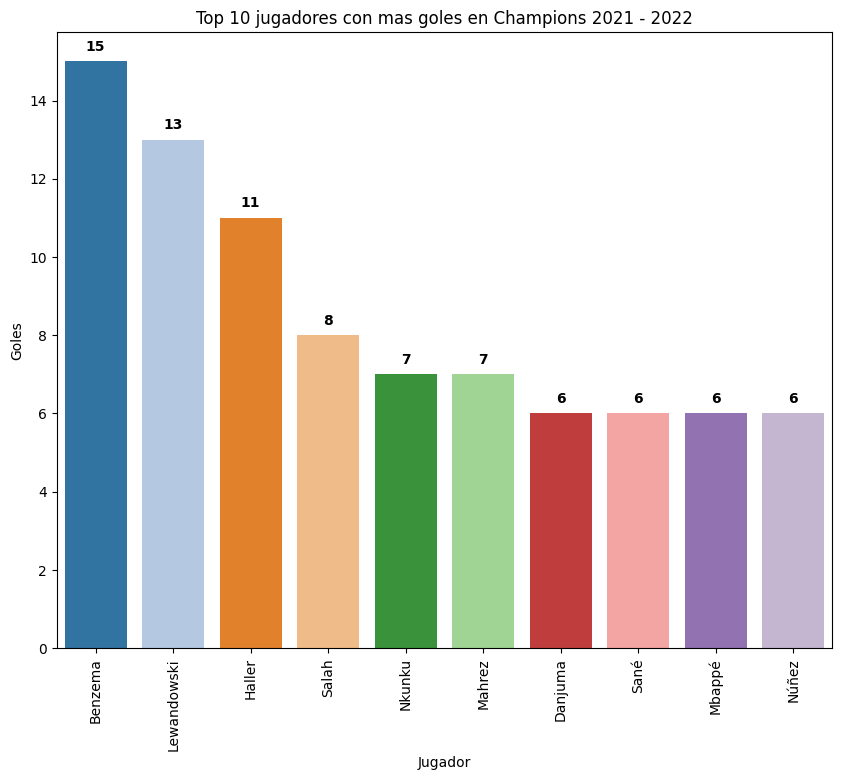

In [ ]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = 'player_name', y = 'goals', data = jugador_mas_goels.head(10), palette = 'tab20', hue = 'player_name')
for p in ax.patches:
  ax.text(p.get_x() + p.get_width() / 2,
          p.get_height() + 0.2,
          int(p.get_height()),
          ha='center', va='bottom',        # centrado
          fontsize=10, fontweight='bold'
  )
plt.xticks(rotation = 90)
plt.title("Top 10 jugadores con mas goles en Champions 2021 - 2022")
plt.ylabel("Goles")
plt.xlabel("Jugador")
plt.show()